In [9]:
import seaborn
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz as gv
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as rfc

## Aufgabe a. 
## Generiere 1000 künstliche Datensätze mit 5 metrischen Merkmalen. Jeder Datensatz soll einer von 4 Zielklassen zugeordnet sein.
Stelle dir vor, dass die 5 erzeugten Merkmale messbaren Eigenschaften von 1000 Kunden entsprechen, die in 4 Gruppen wie z.B. Bonitäts-oder Prioritätsklassen segmentiert werden sollen

In [10]:
x, y = make_blobs(n_samples=1000, n_features=5, centers=4, cluster_std=3, random_state=0) #samples = Datensätze, features = Merkmale, centers = Zielklassen, cluster_std = Standardabweichung, random_state = Zufallszahlengenerator
x # Ausgabe 1000 künstliche Datensätze à 5 Merkmale

array([[  4.2900055 ,   1.2593096 ,   0.24827196,   3.66188885,
         -0.14446058],
       [  1.681067  ,  -2.45863333,   2.34537436,   7.18574985,
         -1.59087155],
       [  4.59321328,  -0.93449785,   5.19647879,  11.32842795,
        -16.72811976],
       ...,
       [ -7.93096819, -14.08186468,   5.21229594,  11.04946131,
          5.03603886],
       [  3.09353384,   6.03137763,   0.35870238,  11.23490864,
        -11.08959196],
       [-10.66713243, -12.36153503,  11.97456592,   5.64940373,
          9.05913451]])

In [11]:
x.shape #gibt die Array-Dimension von x aus

(1000, 5)

In [12]:
y # Ausgabe Zielklassen von 0-3

array([0, 1, 2, 0, 0, 3, 2, 0, 3, 2, 3, 3, 1, 1, 3, 0, 1, 2, 1, 2, 0, 0,
       2, 1, 3, 0, 3, 3, 3, 1, 2, 3, 0, 1, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2,
       1, 3, 1, 3, 1, 2, 1, 2, 0, 2, 2, 2, 0, 3, 0, 3, 2, 3, 3, 1, 2, 1,
       0, 1, 2, 2, 3, 2, 0, 2, 0, 3, 3, 1, 2, 0, 2, 0, 3, 0, 1, 0, 1, 1,
       2, 3, 0, 3, 1, 0, 1, 0, 1, 2, 0, 3, 2, 1, 2, 3, 2, 3, 1, 1, 2, 2,
       3, 1, 2, 2, 2, 1, 2, 3, 1, 3, 2, 1, 3, 0, 2, 3, 0, 0, 0, 0, 0, 0,
       3, 3, 3, 3, 1, 3, 1, 3, 3, 1, 2, 1, 0, 3, 1, 0, 3, 0, 3, 2, 0, 2,
       2, 0, 2, 3, 0, 3, 1, 2, 1, 3, 2, 2, 2, 0, 3, 0, 2, 2, 3, 1, 1, 3,
       1, 3, 1, 3, 2, 0, 2, 0, 2, 2, 2, 1, 1, 1, 3, 0, 1, 1, 1, 3, 3, 2,
       2, 1, 1, 3, 3, 1, 1, 1, 2, 3, 0, 3, 0, 1, 3, 0, 3, 2, 0, 2, 1, 2,
       0, 0, 0, 1, 0, 1, 0, 3, 1, 0, 3, 3, 2, 1, 2, 2, 2, 0, 3, 2, 1, 2,
       1, 1, 0, 1, 3, 1, 2, 0, 2, 2, 3, 0, 3, 2, 2, 3, 0, 1, 2, 1, 2, 2,
       3, 1, 1, 3, 1, 3, 3, 1, 3, 0, 1, 1, 2, 1, 1, 3, 3, 0, 0, 1, 1, 3,
       0, 3, 0, 1, 0, 2, 2, 1, 3, 0, 2, 0, 3, 1, 2,

In [13]:
y.shape #gibt die Array-Dimension von y aus

(1000,)

In [14]:
df = pd.DataFrame(x) # Erstellung eines Datensatzes aus x

In [15]:
df.insert(5, "Bonitätsklassen", y) # Hinzufügen der Zielklassen

In [16]:
df # Ausgabe neuer Datensatz bestehend aus x und y

,0,1,2,3,4,Bonitätsklassen
0,4.290005,1.259310,0.248272,3.661889,-0.144461,0
1,1.681067,-2.458633,2.345374,7.185750,-1.590872,1
2,4.593213,-0.934498,5.196479,11.328428,-16.728120,2
3,-0.061675,2.912999,3.499712,-3.724727,-1.337118,0
4,2.348517,1.409951,-0.292620,0.566496,-4.690789,0
...,...,...,...,...,...,...
995,-0.273205,-2.541545,9.553714,11.305926,1.590382,1
996,0.605529,-2.690792,9.946217,12.060691,-1.217652,1
997,-7.930968,-14.081865,5.212296,11.049461,5.036039,3
998,3.093534,6.031378,0.358702,11.234909,-11.089592,2


## Aufgabe b.
## Visualisiere die Abhängigkeiten zwischen diesen 5 Merkmalen.

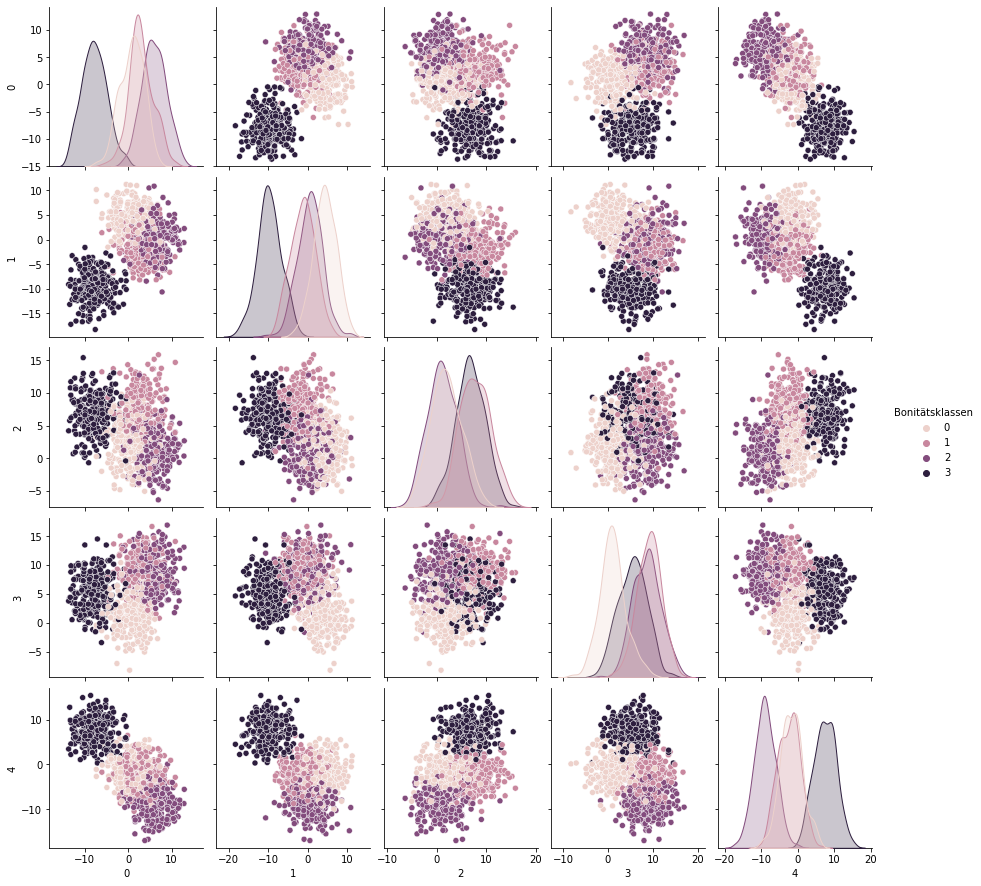

In [17]:
seaborn.pairplot(df, hue ="Bonitätsklassen")

# Klassifikationsbaum

## Aufgabe c.
## Teile  die  Datensätze  in  Trainingsdaten  (80%)  und  Testdaten  (20%) auf.

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Aufteilung in Trainings- und Testdaten erfolgt, damit:
# 1. Ein Modell erstellt werden kann (Trainingsdaten) und 
# 2. Das erstellte Modell überprüft werden kann (Testdaten)

## Aufgabe d.
## Trainiere einen Klassifikationsbaum anhand der Trainingsdaten.

In [19]:
clf = tree.DecisionTreeClassifier(criterion="gini", min_impurity_decrease=0.05)

In [20]:
clf = clf.fit(x_train, y_train) #Erstellung eines Entscheidungsbaum-Klassifikators aus dem Trainingssatz (x, y)

## Aufgabe e.
## Visualisiere den resultierenden Klassifikationsbaum und interpretiere das Ergebnis.

In [21]:
gv.Source(tree.export_graphviz(clf, filled=True))

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

## Aufgabe f.
## Rechne die Unreinheit gemäß Gini-Index des ersten Knotens nach.

In [22]:
t = clf.tree_ # Deklarierung des Klassifikationsbaumes

In [20]:
impurity = 1 - np.sum((t.value[0] / t.n_node_samples[0]) **2) # Berechnung der Unreinheit

In [21]:
impurity, t.impurity[0]

(0.749803125, 0.749803125)

In [22]:
# Die Unreinheit gemäß Gini-Index des ersten Knotens beträgt ca. 75 Prozent. 

## Aufgabe g.
## Berechne die Verbesserung der Unreinheit durch den ersten Split.

In [24]:
parent_impurity = t.impurity[0]
left_child_impurity = t.impurity[1] * t.n_node_samples[1] / t.n_node_samples[0]
# Manuelle Rechnung: 
# impurity[1] = 1-np.sum((t.value[1]/t.n_node_samples[1])**2)
right_child_impurity = t.impurity[2] * t.n_node_samples[2] / t.n_node_samples[0]
# Manuelle Rechnung: 
# impurity[2] = 1-np.sum((t.value[2]/t.n_node_samples[2])**2)

improve = parent_impurity - (left_child_impurity + right_child_impurity)
improve # Ausgabe 

0.20105075981551557

In [25]:
# Die Verbesserung der Unreinheit durch den ersten Split beträgt ca. 20 Prozent. 

## Aufgabe h.
## Teste die Genauigkeit des Klassifikationsbaums anhand der Testdaten. Gebe die Konfusionsmatrix für den Klassifikationsbaum aus.

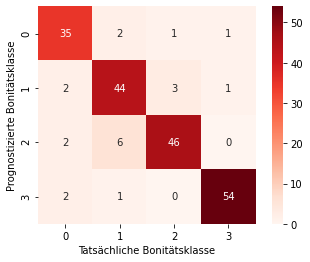

Genauigkeit:  0.895


In [51]:
def test_classifier(tclf, x_test, y_test): #Funktion
    y_pred=tclf.predict(x_test) 
    cm=confusion_matrix(y_true = y_test, y_pred=y_pred)
    
    seaborn.heatmap(cm.T, square=True,annot=True, cmap="Reds")
    plt.xlabel("Tatsächliche Bonitätsklasse");plt.ylabel("Prognostizierte Bonitätsklasse");plt.show()
    
    print("Genauigkeit: ", accuracy_score(y_true=y_test, y_pred=y_pred))
    #print("Relevanz: ", precision_score(y_true=y_test, y_pred=y_pred))
    return y_pred

y_tree_pred = test_classifier(clf, x_test, y_test) #Funktionsaufruf

In [47]:
# Die Genauigkeit beträgt 89,5 Prozent.

# Random-Forest-Klassifikator

## Aufgabe i.
## Trainiere einen Random-Forest-Klassifikator, der aus 20 Bäumen bestehen soll.

In [23]:
forestClf = rfc(n_estimators=20, random_state=0)
forestClf = forestClf.fit(x_train, y_train)
# Dient der Zuordnung von Objekten zu Klassen

## Aufgabe j.
## Teste den Random-Forest-Klassifikator anhand der Testdaten und gebe wiederum die Genauigkeit und die Konfusionsmatrix aus. Vergleiche die Ergebnisse mit den vorherigen Genauigkeiten und Konfusionsmatrizen.

In [ ]:
y_forest_pred = test_classifier(forestClf, x_test, y_test)

In [59]:
# Die Genauigkeit hat sich um 4,5 Prozent verbessert, es ist unter anderem daran erkennbar, dass sich die ausgeprägten Heatmap Felder gesteigert haben.

## Aufgabe k.
## Erzeuge einen Bericht der Klassifikation und erkläre die Begriffe der Ausgabe.

In [62]:
print(classification_report(y_true=y_test, y_pred=y_forest_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        41
           1       0.94      0.87      0.90        53
           2       0.89      0.94      0.91        50
           3       1.00      1.00      1.00        56

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



In [24]:
# precision --> (True positives)/(True positives + false positives)
# recall --> (true positives)/(true positives + false negatives)
# f1 - Score --> Gewichter Durchschnitt der Precison und Recall Werte
# support --> 

# accuracy --> Anteil an richtigen Vorhersagen
# macro avg --> Gibt den Durchschnitt zurück, ohne den Anteil für jedes Label im Dataset zu berücksichtigen
# weighted avg --> Gibt den Durchschnitt unter Berücksichtigung des Anteils für jedes Label im Dataset zurück